In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation']


tss_annotation = doc['tss_annotation']


import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 16)


In [2]:
import plot_tss_results

## peak bins -1kb:+1kb, no introns

('Number of genes with greater than 10 peaks:', 0)


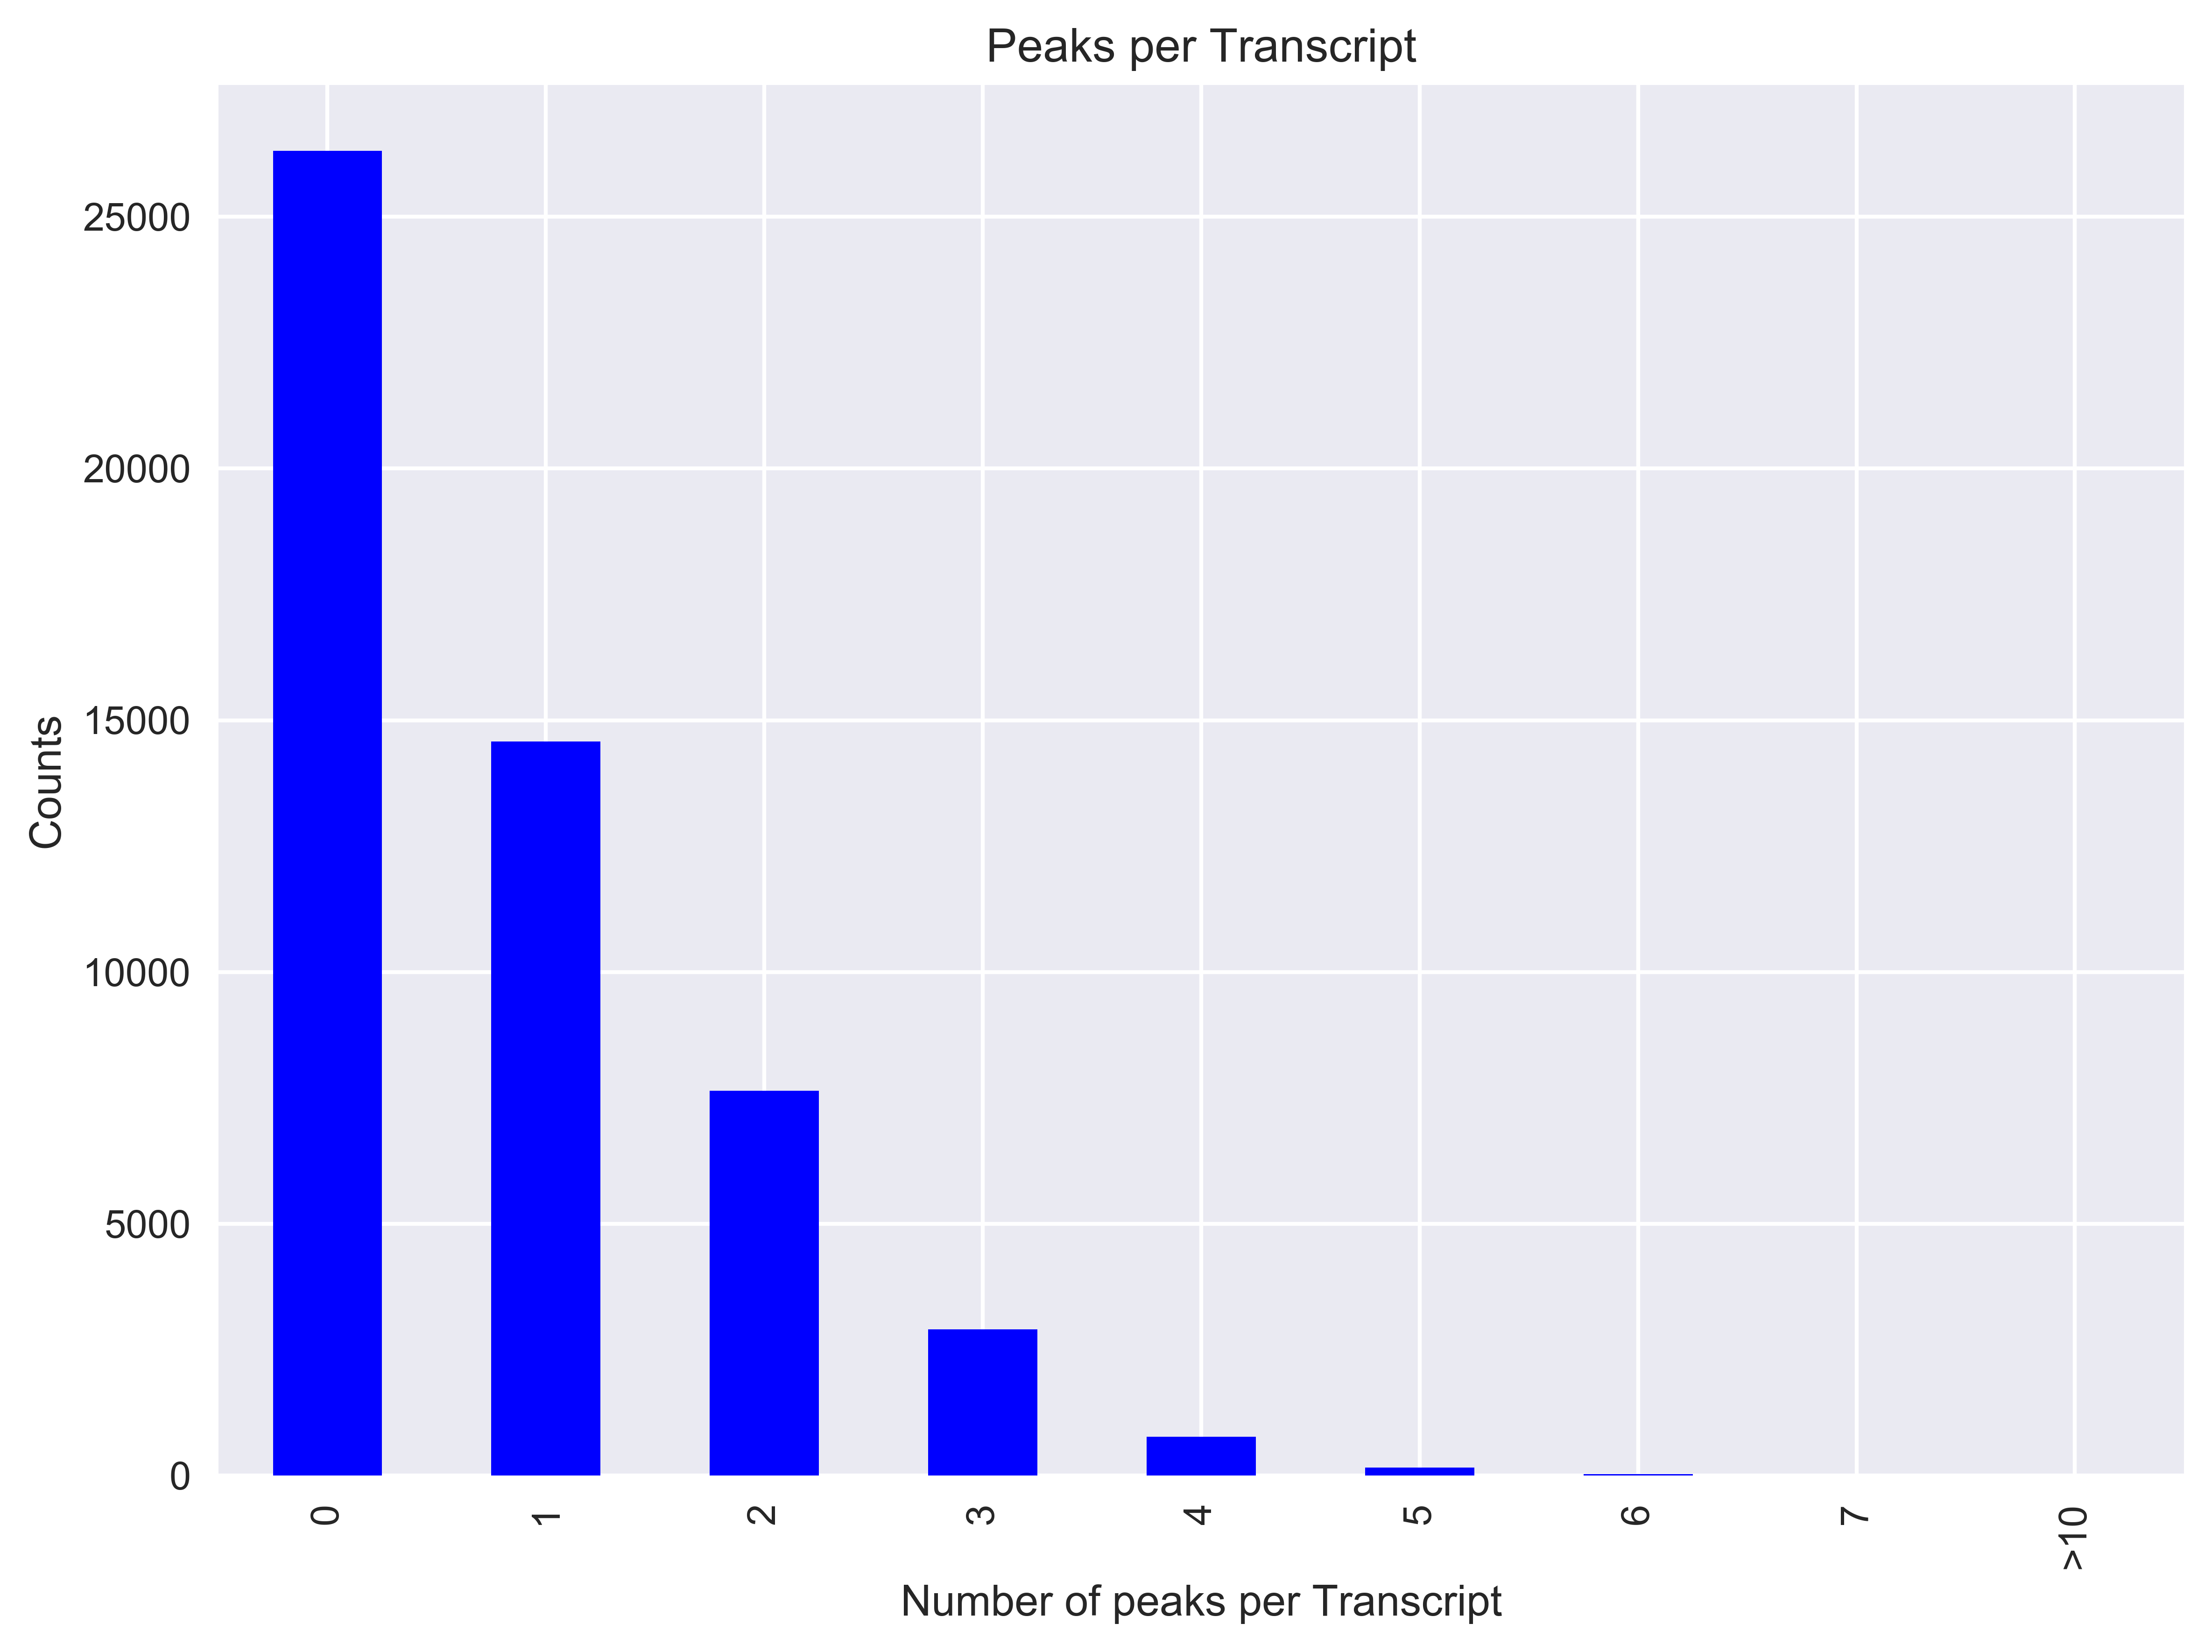

In [18]:
f_in = 'Results/tss_annotation/txn_df_02.p'
landmark_name = 'Transcript'
plot_tss_results.plot_peaks_per_landmark(f_in,landmark_name)

('Number of genes with greater than 10 peaks:', 156)


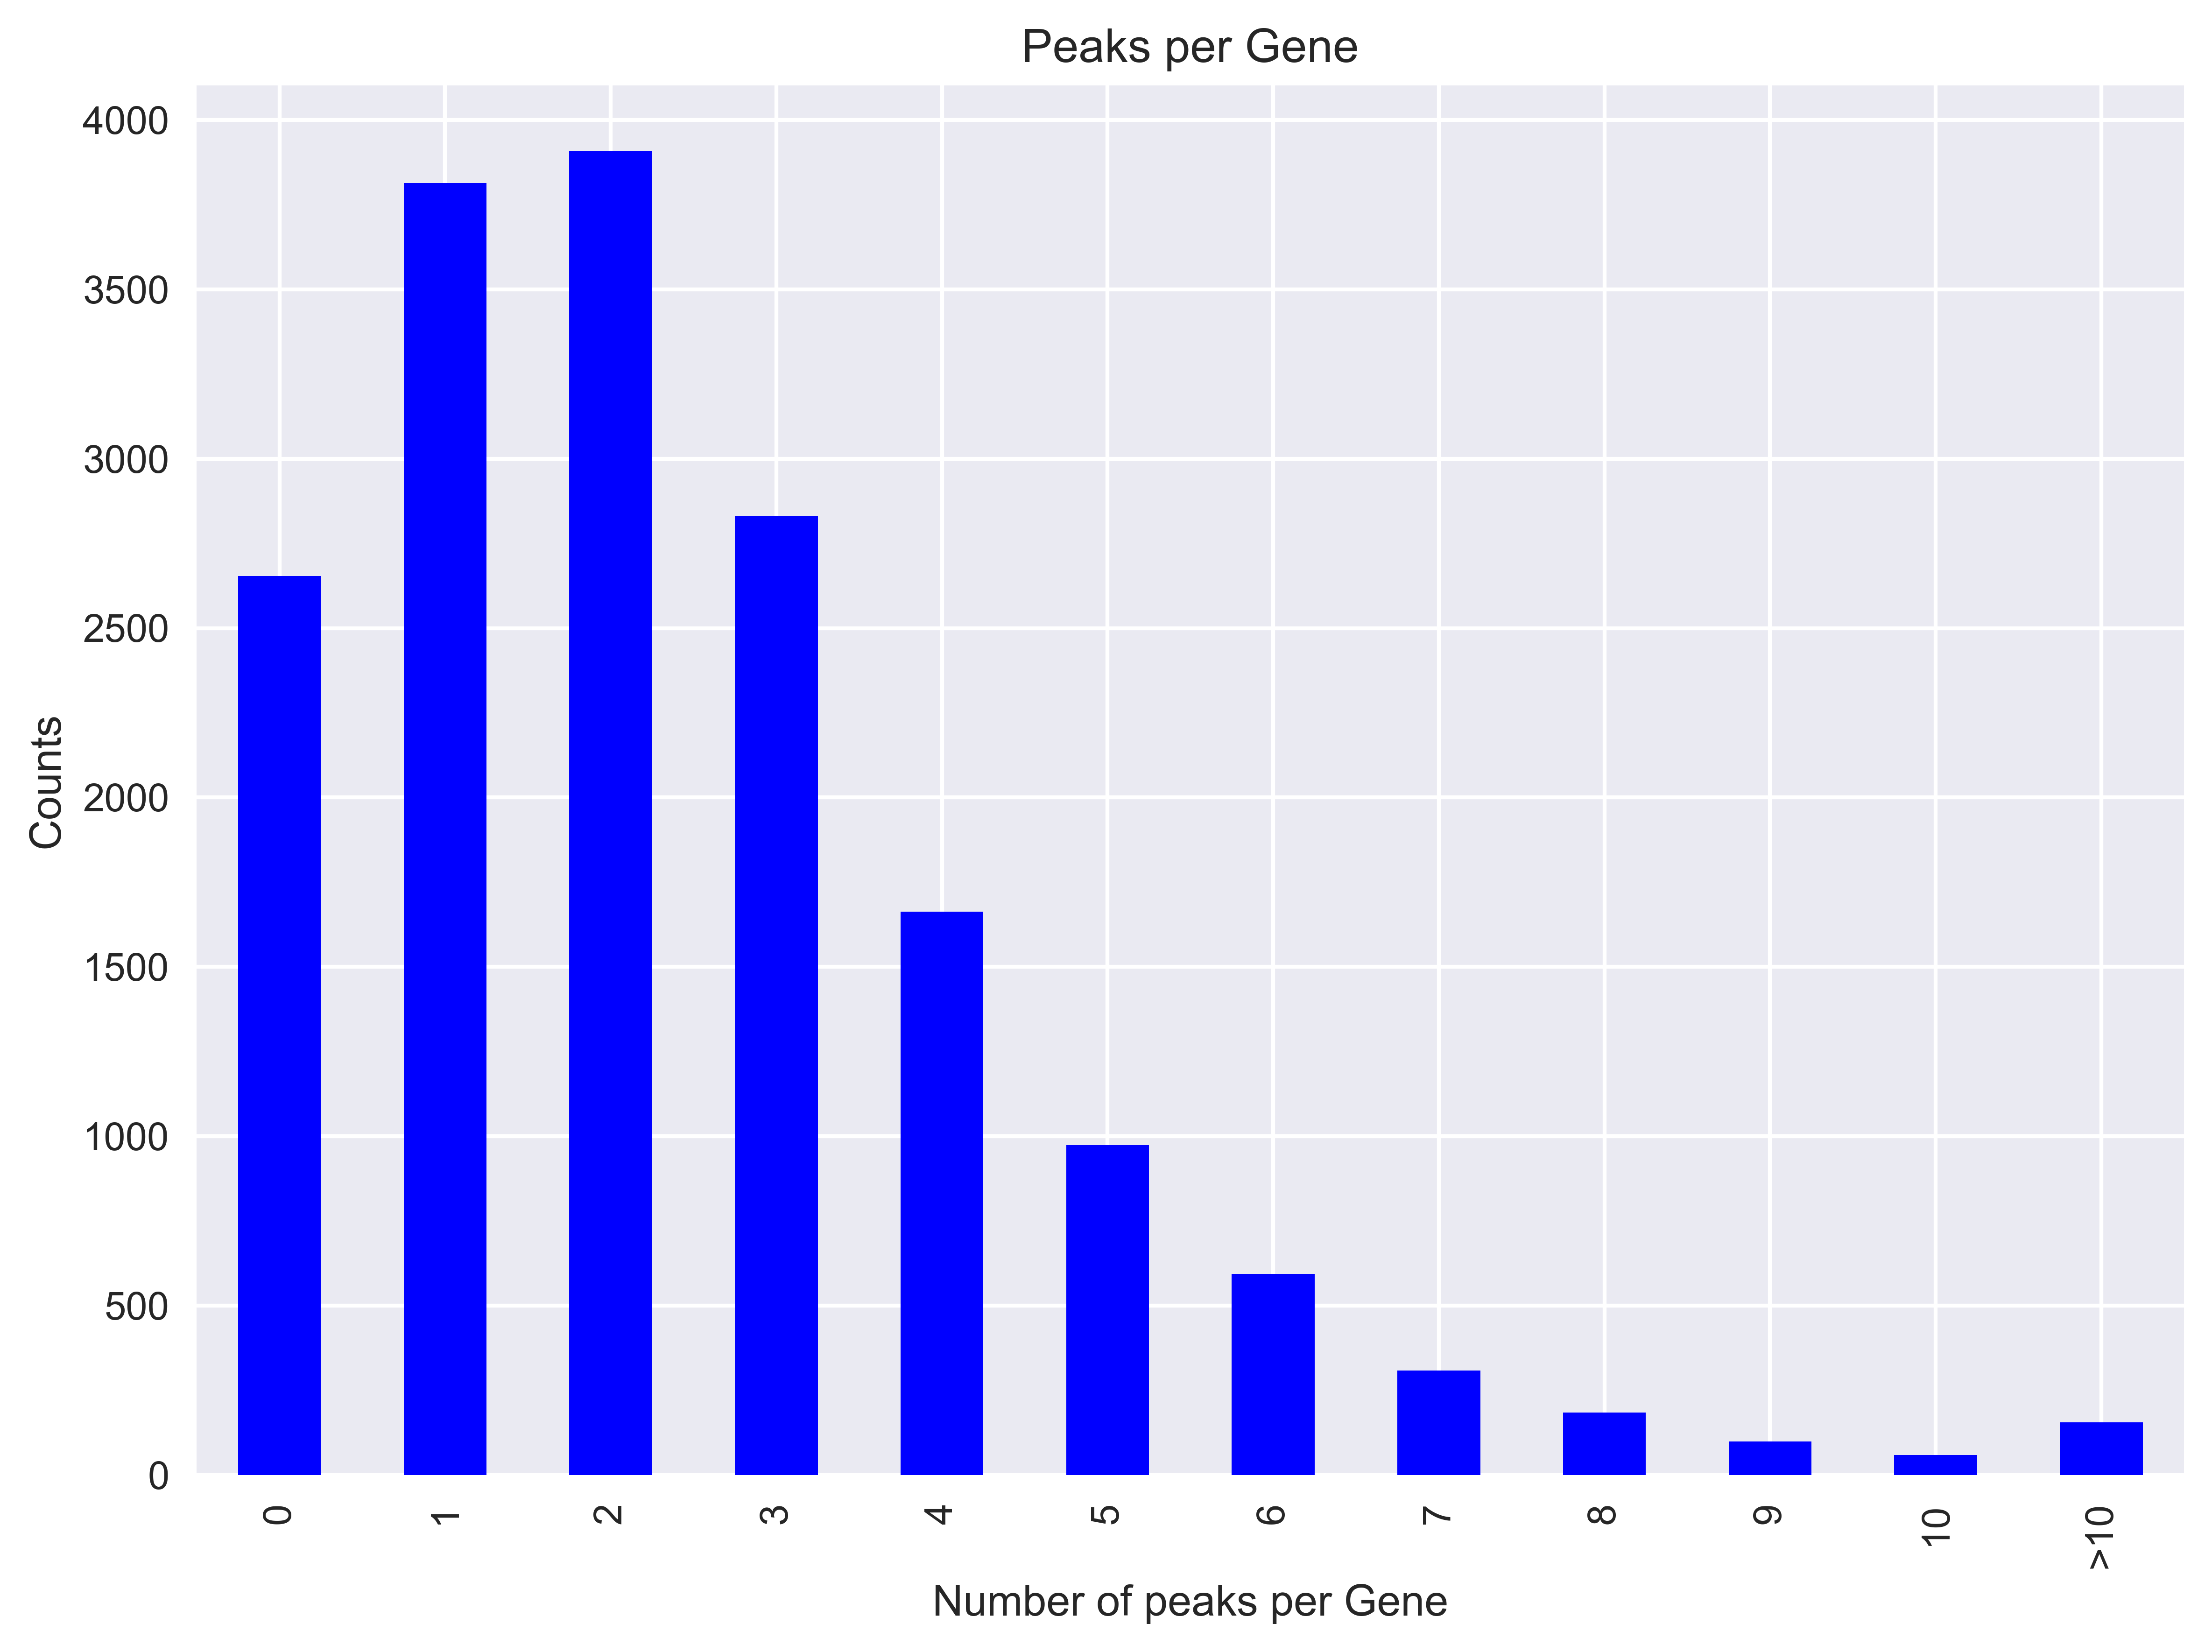

In [19]:
f_in = 'Results/tss_annotation/gene_df_02.p'
landmark_name = 'Gene'

plot_tss_results.plot_peaks_per_landmark(f_in,landmark_name)

IOError: [Errno 2] No such file or directory: 'Results/tss_annotation/gene_id_df_02.p'

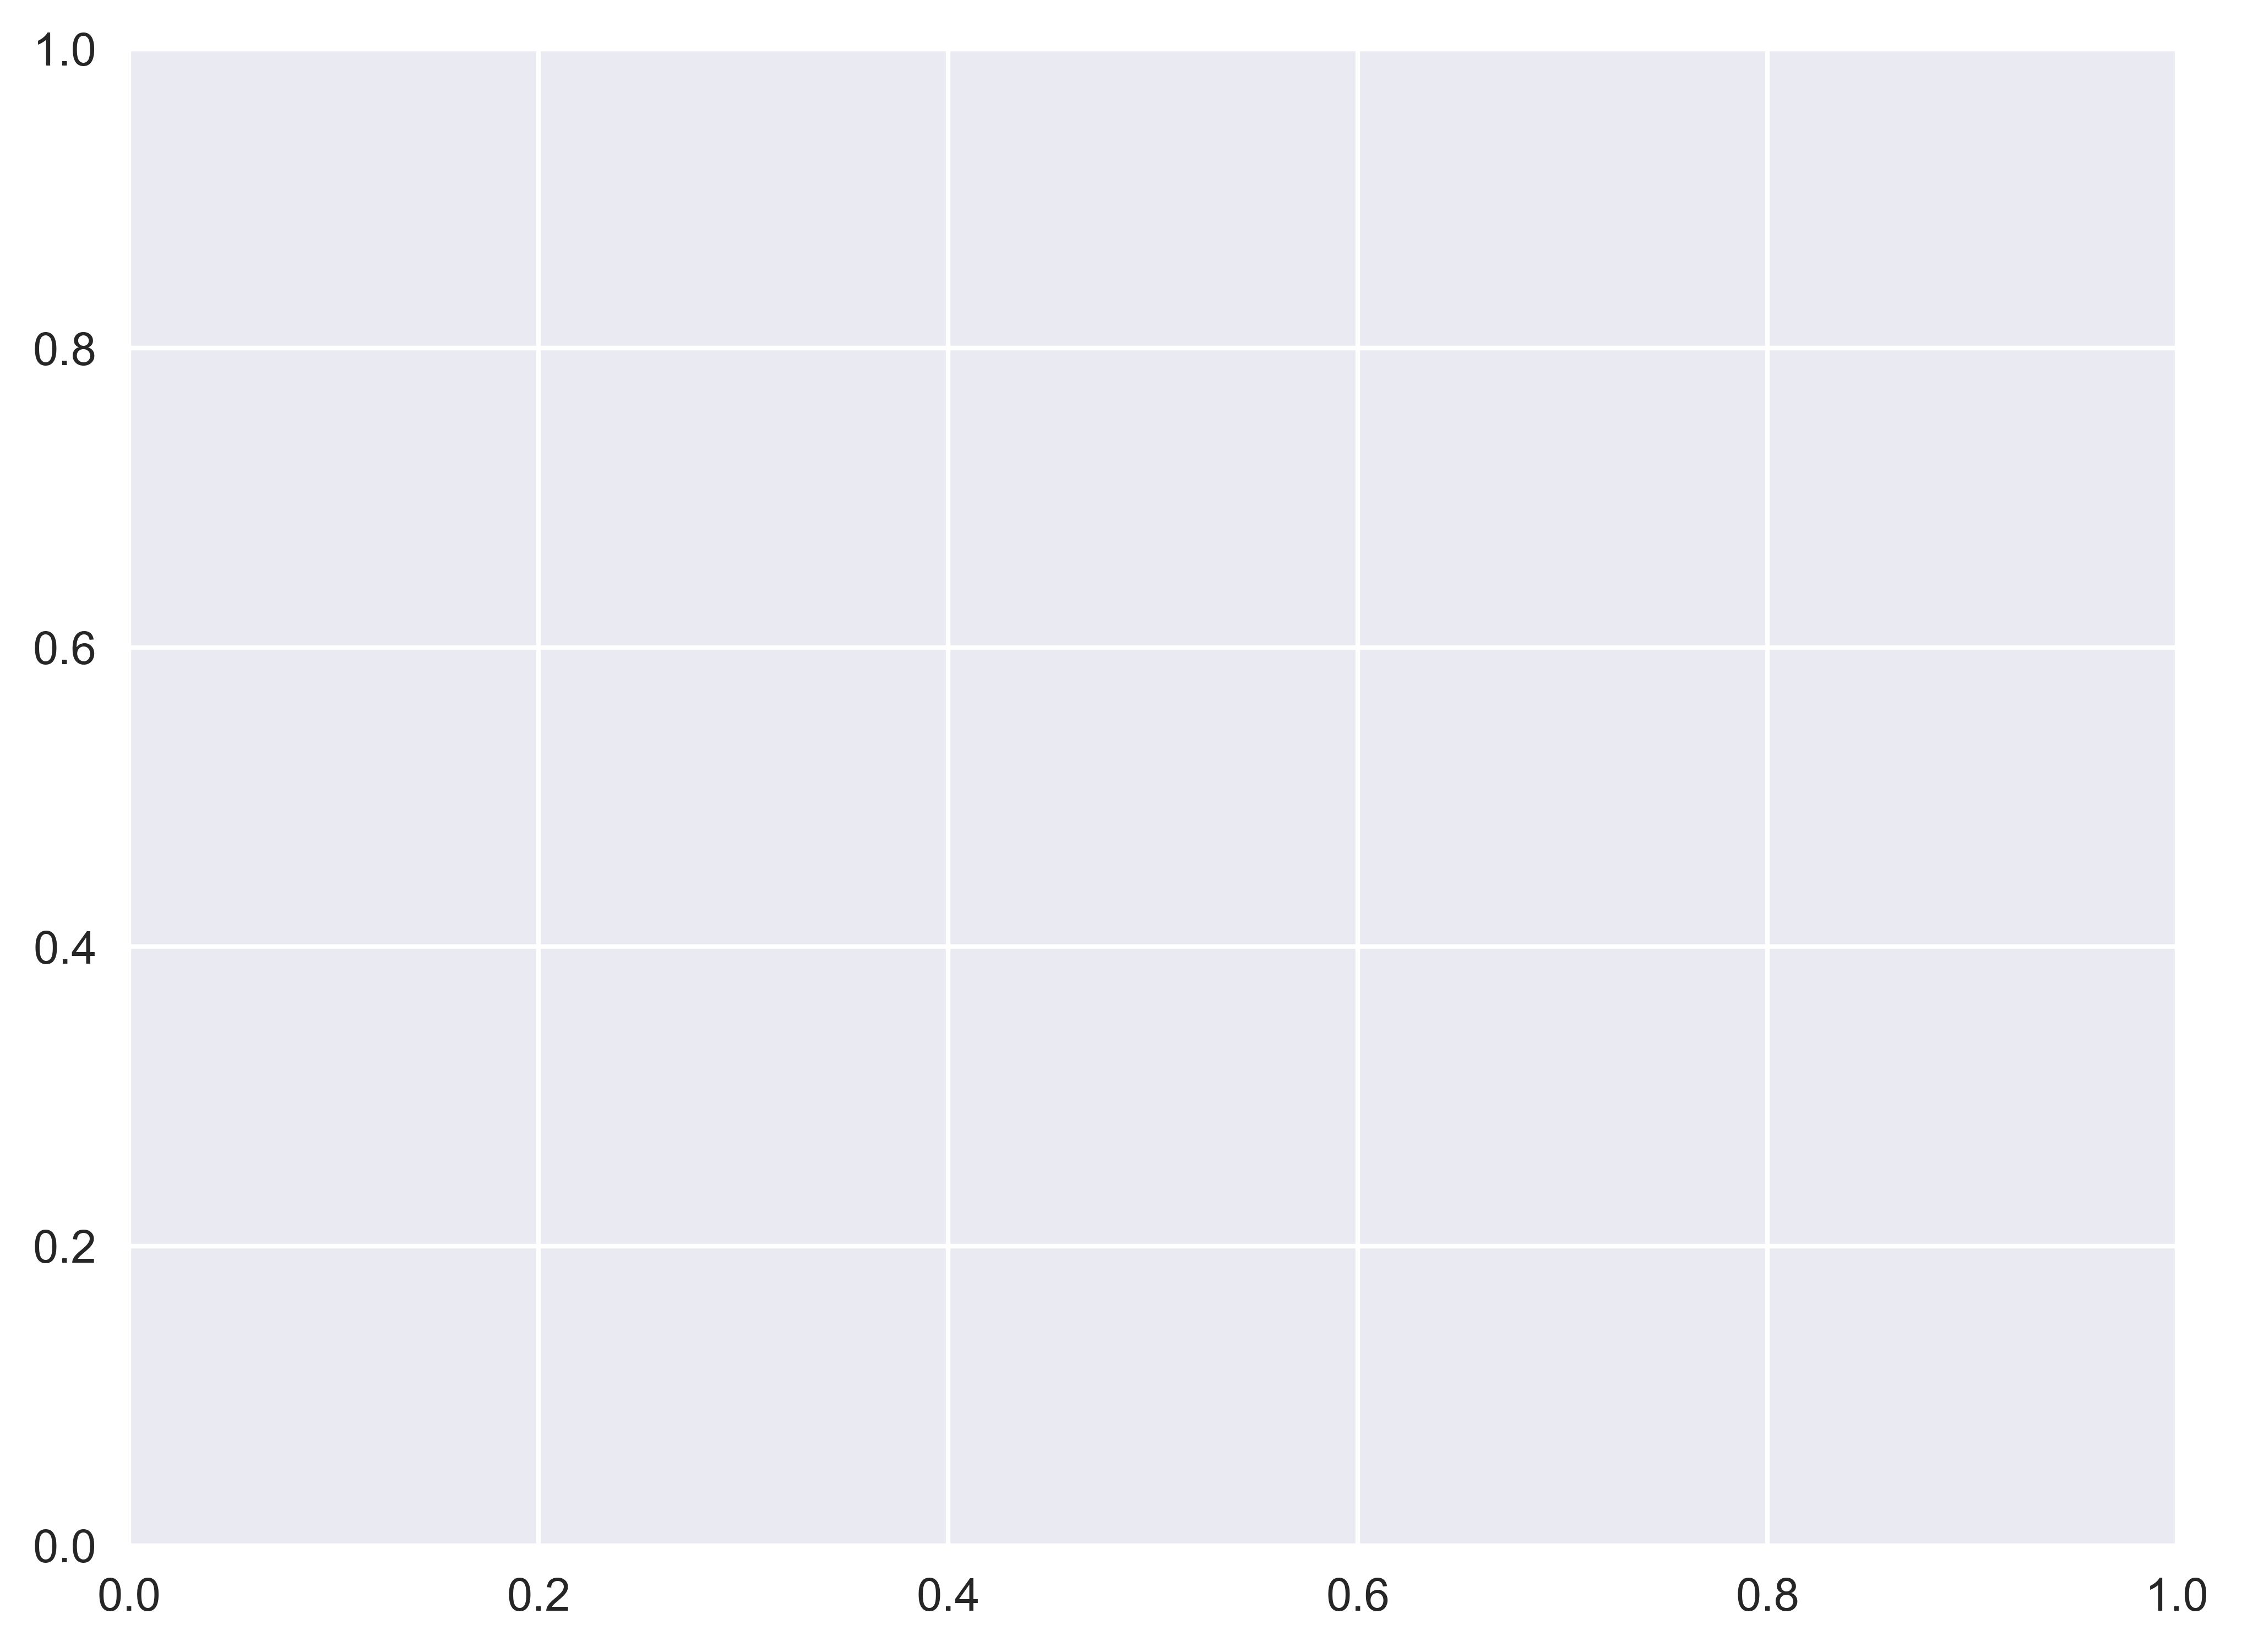

In [11]:
f_in = 'Results/tss_annotation/gene_id_df_02.p'
landmark_name = 'Gene_id'

plot_tss_results.plot_peaks_per_landmark(f_in,landmark_name)

In [ ]:
tss = pd.read_csv(tss_annotation,sep='\t',index_col=0)

In [ ]:
peak_tissue_matrix = pd.read_csv('Results/merged/samples.merge.peaksexpression',index_col=0,sep='\t')
peak_tissue_matrix.head()

In [ ]:
meta_samples = pd.read_csv("raw_metaSamples.tsv",sep="\t",index_col=0)
meta_samples.head()

In [ ]:
meta_samples = pd.read_csv('Results/meta_samples.csv',index_col=0)
meta_samples = meta_samples.set_index('Full')
meta_samples.head()


## txn

In [ ]:
print('Percent of isoforms identified: ', 1.0*np.sum(txn_df['hasGene'])/txn_df.shape[0])
print('Percent of genes identified: ', 1.0*np.sum(gene_df['hasGene'])/gene_df.shape[0])

In [ ]:
#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(gene_df['Number of SS']);

gene_df_small = gene_df[gene_df['Number of SS']<10]
gene_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per gene')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_df['Number of SS']>10))
plt.title('Number of peaks per gene')
plt.tight_layout()
plt.savefig('Results/Figures/Number_of_peaks_per_gene.pdf')

#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(gene_id_df['Number of SS']);
gene_id_df_small = gene_id_df[gene_id_df['Number of SS']<10]
gene_id_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per gene_id')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_id_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_id_df['Number of SS']>10))
plt.title('Number of peaks per gene_id')
plt.savefig('Results/Figures/Number_of_peaks_per_gene_id.pdf')

#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(txn_df['Number of SS']);
txn_df_small = txn_df[txn_df['Number of SS']<10]
txn_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per transcipt')
#ax.set_xticks(range(0,max(txn_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(txn_df['Number of SS']>10))

plt.title('Number of peaks per tss')
plt.savefig('Results/Figures/Number_of_peaks_per_txn.pdf')

### Tissues overall gene expression

In [ ]:
f = plt.figure(dpi=300)
ax = (np.sum((gene_tissue_matrix>0))/gene_df.shape[0]).plot.bar(color='b')
ax.set_title('Fraction of genes with a peak');
ax.set_xticklabels(meta_samples.loc[gene_tissue_matrix.columns,'Short']);
plt.tight_layout()
plt.savefig('Results/Figures/tissue_genes.pdf')

## Collapse experimental type 

In [ ]:
tissues_genes = dict()
for t in tissues:
    tissues_genes[t] = 0

for ind,val in gene_df.iterrows():
    curr_ts = set()
    for t in val['maxTissues']:
        curr_ts.add(t.split('_')[0])
    for t in curr_ts:
        tissues_genes[t] += 1
        if '1h' in t or 'KLA' in t:
            print(t)

no_peak = []
for t in tissues_genes:
    if tissues_genes[t] == 0:
        no_peak.append(t)

for t in no_peak:
    tissues_genes.pop(t,None)

plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
plt.xticks(range(len(tissues_genes)), list(tissues_genes.keys()),rotation=90);
plt.ylabel('Fraction of genes covered by tissue')
plt.title('TSS across tissues')

### Tissue Distribution

In [ ]:
not_in_cho = []
in_cho = []
all_t = []
for g in gene_df['tissues']:
    curr = [i.split('_')[0] for i in g ]
    curr = np.unique(np.array(curr))
    if 'CHO' in curr:
        in_cho.append(len(curr))
    else:
        not_in_cho.append(len(curr))
    all_t.append(len(curr))

f = plt.figure(dpi=300)
pd.Series(Counter(all_t)).plot.bar(color='y')
plt.xlabel('Tissues per gene start site')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues.pdf',bbox_inches='tight')

f = plt.figure(dpi=300)
pd.Series(Counter(not_in_cho)).plot.bar(color='y')
plt.xlabel('Tissues per gene start site')
plt.title('Not in CHO')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues_not_in_cho.pdf',bbox_inches='tight')

In [ ]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png')

In [ ]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png')

In [ ]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png')

# 1kb - 1kb

In [ ]:
txn_df = pickle.load(open('Results/txn_df_1kb_1kb.p','rb'))
gene_df = pickle.load(open('Results/gene_df_1kb_1kb.p','rb'))
gene_id_df = pickle.load(open('Results/gene_id_df_1kb_1kb.p','rb'))
gene_tissue_matrix = pd.read_csv('Results/merged/genes_tissues_1kb_1kb.csv',index_col = 0)

In [ ]:
print('Percent of isoforms identified: ', 1.0*np.sum(txn_df['hasGene'])/txn_df.shape[0])
print('Percent of genes identified: ', 1.0*np.sum(gene_df['hasGene'])/gene_df.shape[0])

In [ ]:
#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(gene_df['Number of SS']);
gene_df_small = gene_df[gene_df['Number of SS']<10]
gene_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per gene')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_df['Number of SS']>10))
plt.title('Number of peaks per gene')
plt.tight_layout()
plt.savefig('Results/Figures/Number_of_peaks_per_gene_1kb_1kb.pdf')

#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(gene_id_df['Number of SS']);
gene_id_df_small = gene_id_df[gene_id_df['Number of SS']<10]
gene_id_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per gene_id')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_id_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_id_df['Number of SS']>10))
plt.title('Number of peaks per gene_id')
plt.savefig('Results/Figures/Number_of_peaks_per_gene_id_1kb_1kb.pdf')

#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(txn_df['Number of SS']);
txn_df_small = txn_df[txn_df['Number of SS']<10]
txn_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per transcipt')
#ax.set_xticks(range(0,max(txn_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(txn_df['Number of SS']>10))

plt.title('Number of peaks per tss')
plt.savefig('Results/Figures/Number_of_peaks_per_txn_1kb_1kb.pdf')

### Tissues overall gene expression

In [ ]:
f = plt.figure(dpi=300)
ax = (np.sum((gene_tissue_matrix>0))/gene_df.shape[0]).plot.bar()
ax.set_title('Fraction of genes with a peak');
ax.set_xticklabels(meta_samples.loc[gene_tissue_matrix.columns,'Short']);
plt.tight_layout()
plt.savefig('Results/Figures/tissue_genes_1kb_1kb.pdf')

## Collapse experimental type 

In [ ]:
tissues_genes = dict()
for t in tissues:
    tissues_genes[t] = 0

for ind,val in gene_df.iterrows():
    curr_ts = set()
    for t in val['maxTissues']:
        curr_ts.add(t.split('_')[0])
    for t in curr_ts:
        tissues_genes[t] += 1
        if '1h' in t or 'KLA' in t:
            print(t)

no_peak = []
for t in tissues_genes:
    if tissues_genes[t] == 0:
        no_peak.append(t)

for t in no_peak:
    tissues_genes.pop(t,None)

    
#f = plt.figure(dpi=300)
f,ax = plt.subplots(dpi=300)
#f.patch.set_visible(False)


plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(len(tissues_genes)), list(tissues_genes.keys()),rotation=90);
plt.ylabel('Fraction of genes covered by tissue')
plt.title('TSS across tissues')

plt.savefig('Results/Figures/tissue_genes_collapsed_1kb_1kb.pdf')


# f = plt.figure(dpi=300)
# plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
# plt.xticks(range(len(tissues_genes)), list(tissues_genes.keys()),rotation=90);
# plt.ylabel('Fraction of genes covered by tissue')
# plt.title('TSS across tissues')
# plt.savefig('Results/Figures/tissue_genes_collapsed_1kb_1kb.pdf')



In [ ]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}


mpl.rc('font',**font)

In [ ]:
np.sum(gene_df['hasGene'])

In [ ]:
np.sum(txn_df['hasGene'])

In [ ]:
gene_df.shape

In [ ]:
1.0*np.sum(txn_df['hasGene'])/txn_df.shape[0]

In [ ]:
1.0*np.sum(gene_df['hasGene'])/gene_df.shape[0]

In [ ]:

f,ax = plt.subplots(dpi=300)
#f.patch.set_visible(False)

#tissues_genes['Cumulative genes'] = 1.0*np.sum(gene_df['hasGene'])

x = range(len(tissues_genes)+1)
names = list(tissues_genes.keys()) #Add the total number of genes
names.append('Cumulative fraction')
y = 1.0*np.array(tissues_genes.values())/(gene_df.shape[0])
y = np.append(y,[1.0*np.sum(gene_df['hasGene'])/(gene_df.shape[0])])

#barlist = plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
barlist = plt.bar(x, y, align='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
barlist[-1].set_color('purple')
plt.xticks(range(len(tissues_genes)+1), names,rotation=90);
plt.ylabel('Fraction of genes covered by tissue',{'fontsize': 22})
plt.title('TSS across tissues',{'fontsize': 22})

plt.savefig('Results/Figures/tissue_genes_collapsed_1kb_1kb.pdf',dpi=300,bbox_inches='tight')



### Tissue Distribution

In [ ]:
not_in_cho = []
in_cho = []
all_t = []
for g in gene_df['tissues']:
    curr = [i.split('_')[0] for i in g ]
    curr = np.unique(np.array(curr))
    if 'CHO' in curr:
        in_cho.append(len(curr))
    else:
        not_in_cho.append(len(curr))
    all_t.append(len(curr))

f = plt.figure(dpi=300)
pd.Series(Counter(all_t)).plot.bar(color='b')
plt.xlabel('Tissues per gene start site')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues_1kb_1kb.pdf',bbox_inches='tight')

f = plt.figure(dpi=300)
pd.Series(Counter(not_in_cho)).plot.bar(color='b')
plt.xlabel('Tissues per gene start site')
plt.title('Not in CHO')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues_not_in_cho_1kb_1kb.pdf',bbox_inches='tight')

## Venn Diagram CHO and not CHO

## Values for each peak

In [ ]:
tss_1kb_1kb = pd.read_csv('/data/isshamie/TSS/Analysis/Results/tss_final/tss_peakCenter_1kb_1kb.bed',sep='\t',header=None)

In [ ]:
tss_1kb_1kb.head()

In [ ]:
tss_1kb_1kb[4].describe()

In [ ]:
sns.distplot(np.log2(tss_1kb_1kb[4]))
plt.title('Experimental genetic transcription start sites')
plt.xlabel('Log2 TSS count per million')
plt.ylabel('Frequency')

In [ ]:
sns.distplot(np.log10(tss_1kb_1kb[4]))
plt.title('Experimental genetic transcription start sites')
plt.xlabel('Log10 TSS count per million')
plt.ylabel('Frequency')
plt.savefig('Results/Figures/log10_CPM_promoter_1kb_1kb.pdf')